<a href="https://colab.research.google.com/github/MrSudhish/training-colab/blob/main/9%7C%7C_loss_function%2C_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn#neural network
import torch.optim as optim #used for optimum, oprtimising, mofidy the weights and value
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(42)
X=torch.linspace(-5,5,100).unsqueeze(1)

In [6]:
X

tensor([[-5.0000],
        [-4.8990],
        [-4.7980],
        [-4.6970],
        [-4.5960],
        [-4.4949],
        [-4.3939],
        [-4.2929],
        [-4.1919],
        [-4.0909],
        [-3.9899],
        [-3.8889],
        [-3.7879],
        [-3.6869],
        [-3.5859],
        [-3.4848],
        [-3.3838],
        [-3.2828],
        [-3.1818],
        [-3.0808],
        [-2.9798],
        [-2.8788],
        [-2.7778],
        [-2.6768],
        [-2.5758],
        [-2.4747],
        [-2.3737],
        [-2.2727],
        [-2.1717],
        [-2.0707],
        [-1.9697],
        [-1.8687],
        [-1.7677],
        [-1.6667],
        [-1.5657],
        [-1.4646],
        [-1.3636],
        [-1.2626],
        [-1.1616],
        [-1.0606],
        [-0.9596],
        [-0.8586],
        [-0.7576],
        [-0.6566],
        [-0.5556],
        [-0.4545],
        [-0.3535],
        [-0.2525],
        [-0.1515],
        [-0.0505],
        [ 0.0505],
        [ 0.1515],
        [ 0.

In [8]:
y= 3*X+torch.randn_like(X)*2

In [9]:
y

tensor([[-13.5476],
        [-14.5147],
        [-15.1721],
        [-13.0351],
        [-11.7257],
        [-14.8944],
        [-11.1555],
        [-13.5404],
        [-10.3857],
        [-11.5929],
        [-10.5298],
        [-10.8439],
        [-12.5103],
        [-10.0469],
        [-11.7080],
        [-11.4386],
        [-10.4236],
        [ -6.5777],
        [ -8.2360],
        [ -8.0904],
        [ -9.6612],
        [ -8.7575],
        [ -8.1868],
        [ -6.3930],
        [ -8.4780],
        [ -5.3581],
        [ -8.4945],
        [ -5.5446],
        [ -6.0800],
        [ -6.3054],
        [ -8.7761],
        [ -6.7391],
        [ -4.7641],
        [ -5.4208],
        [ -6.1626],
        [ -4.1853],
        [ -2.0081],
        [ -4.5873],
        [ -8.0715],
        [ -2.1867],
        [ -7.8390],
        [ -3.4108],
        [ -4.6636],
        [ -0.3450],
        [ -2.2792],
        [ -2.0240],
        [ -3.0222],
        [ -0.3681],
        [  0.1191],
        [ -1.6132],


In [11]:
y[::10]+=15

In [13]:
y

tensor([[ 16.4524],
        [-14.5147],
        [-15.1721],
        [-13.0351],
        [-11.7257],
        [-14.8944],
        [-11.1555],
        [-13.5404],
        [-10.3857],
        [-11.5929],
        [ 19.4702],
        [-10.8439],
        [-12.5103],
        [-10.0469],
        [-11.7080],
        [-11.4386],
        [-10.4236],
        [ -6.5777],
        [ -8.2360],
        [ -8.0904],
        [ 20.3388],
        [ -8.7575],
        [ -8.1868],
        [ -6.3930],
        [ -8.4780],
        [ -5.3581],
        [ -8.4945],
        [ -5.5446],
        [ -6.0800],
        [ -6.3054],
        [ 21.2239],
        [ -6.7391],
        [ -4.7641],
        [ -5.4208],
        [ -6.1626],
        [ -4.1853],
        [ -2.0081],
        [ -4.5873],
        [ -8.0715],
        [ -2.1867],
        [ 22.1610],
        [ -3.4108],
        [ -4.6636],
        [ -0.3450],
        [ -2.2792],
        [ -2.0240],
        [ -3.0222],
        [ -0.3681],
        [  0.1191],
        [ -1.6132],


In [19]:
#architecture of our NN
class SimpleRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(1,10),
            nn.ReLU(),
            nn.Linear(10,1)
        )
    def forward(self,x):
        return self.net(x)

In [29]:
def train_model(loss_fn,loss_name, color):
  model=SimpleRegressor()
  optimizer=optim.Adam(model.parameters(),lr=0.01)
  losses=[]
  for epoch in range(200):
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  # After training, get the final fit
  with torch.no_grad():
    y_fit = model(X)
  return losses, y_fit # Return both losses and the final y_fit

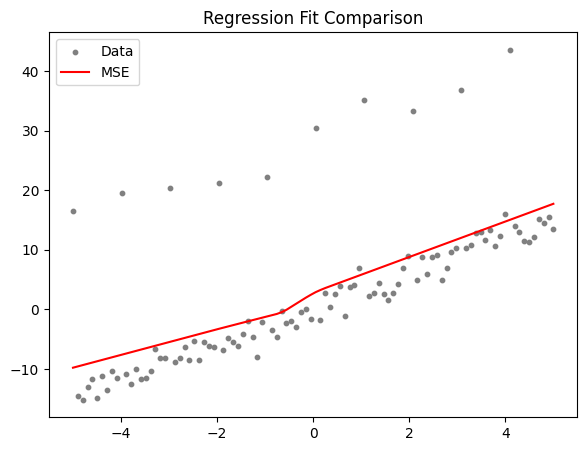

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X,y,s=10,label="Data",color="gray")

plt.title("Regression Fit Comparison")

mse_losses, y_fit_mse = train_model(nn.MSELoss(),"MSE","red") # Capture both return values
plt.plot(X, y_fit_mse, label="MSE", color="red") # Plot the final fit
plt.legend()

In [ ]:
plt.subplot(1,2,2)
plt.plot(mse_losses, label="MSE", color="red")
plt.plot(mae_losses, label)